# Model Comparison: Random vs Popularity vs Item-based CF vs ALS

В этом ноутбуке собираем все полученные ранее результаты по метрикам
`precision@k` и `recall@k` для разных моделей и делаем выводы.


In [1]:
import pandas as pd


data = [
    # k, model, precision@k, recall@k

    # ---- Random baseline ----
    {"k": 5,  "model": "random", "precision@k": 0.0,      "recall@k": 0.0},
    {"k": 10, "model": "random", "precision@k": 0.0,      "recall@k": 0.0},
    {"k": 20, "model": "random", "precision@k": 0.000042, "recall@k": 0.000835},

    # ---- Popularity baseline ----
    # тут значения из pop_results
    {"k": 5,  "model": "popularity", "precision@k": 0.009182, "recall@k": 0.021804},
    {"k": 10, "model": "popularity", "precision@k": 0.005259, "recall@k": 0.026569},
    {"k": 20, "model": "popularity", "precision@k": 0.003297, "recall@k": 0.034098},

    # ---- Item-based CF ----
    # значения из item_cf_results
    {"k": 5,  "model": "item_cf", "precision@k": 0.0,       "recall@k": 0.0},
    {"k": 10, "model": "item_cf", "precision@k": 0.002174,  "recall@k": 0.000418},
    {"k": 20, "model": "item_cf", "precision@k": 0.002174,  "recall@k": 0.001363},

    # ---- ALS ----
    # значения из als_results
    {"k": 5,  "model": "als", "precision@k": 0.0, "recall@k": 0.0},
    {"k": 10, "model": "als", "precision@k": 0.0, "recall@k": 0.0},
    {"k": 20, "model": "als", "precision@k": 0.0, "recall@k": 0.0},
]

results = pd.DataFrame(data)
results


,k,model,precision@k,recall@k
0,5,random,0.000000,0.000000
1,10,random,0.000000,0.000000
2,20,random,0.000042,0.000835
3,5,popularity,0.009182,0.021804
4,10,popularity,0.005259,0.026569
5,20,popularity,0.003297,0.034098
6,5,item_cf,0.000000,0.000000
7,10,item_cf,0.002174,0.000418
8,20,item_cf,0.002174,0.001363
9,5,als,0.000000,0.000000


In [2]:
pivot_precision = results.pivot(index="k", columns="model", values="precision@k")
pivot_recall = results.pivot(index="k", columns="model", values="recall@k")

pivot_precision, pivot_recall


(model  als   item_cf  popularity    random
 k                                         
 5      0.0  0.000000    0.009182  0.000000
 10     0.0  0.002174    0.005259  0.000000
 20     0.0  0.002174    0.003297  0.000042,
 model  als   item_cf  popularity    random
 k                                         
 5      0.0  0.000000    0.021804  0.000000
 10     0.0  0.000418    0.026569  0.000000
 20     0.0  0.001363    0.034098  0.000835)

<Figure size 640x480 with 0 Axes>

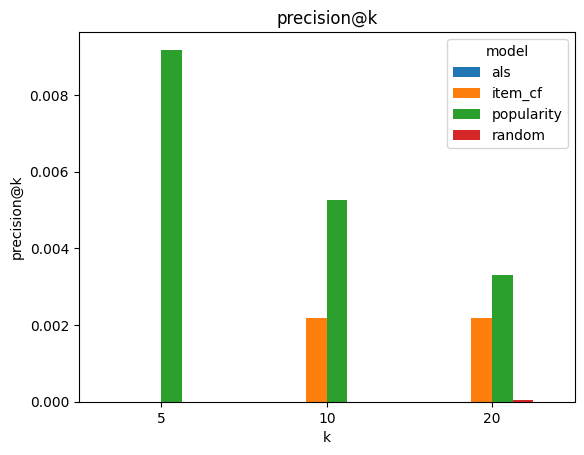

<Figure size 640x480 with 0 Axes>

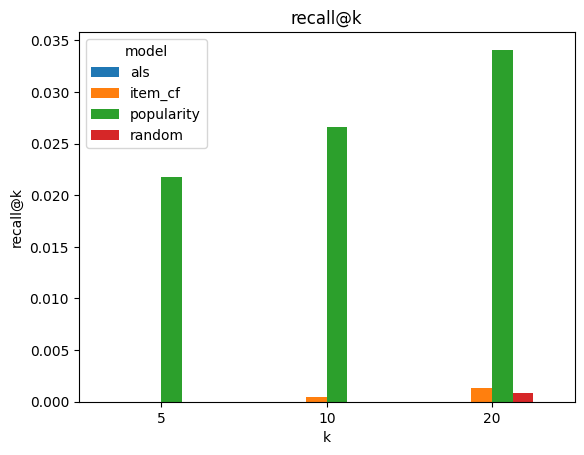

In [3]:
import matplotlib.pyplot as plt

for metric, pivot in [("precision@k", pivot_precision), ("recall@k", pivot_recall)]:
    plt.figure()
    pivot.plot(kind="bar")
    plt.title(metric)
    plt.xlabel("k")
    plt.ylabel(metric)
    plt.xticks(rotation=0)
    plt.legend(title="model")
    plt.show()
